# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
from types import SimpleNamespace
from scipy import optimize
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tabulate import tabulate
plt.style.use('seaborn-whitegrid')
import math

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from inauguralproject_bis import HouseholdSpecializationModelClass

C:\Users\Phili\AppData\Local\Temp\ipykernel_19256\4042047085.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Question 1

**This point has a double loop to calculate the utility for each possible combination of alpha and sigma. The utility is calculated calling the solve_discrete function. The results are discrete and presented in a table format.**

In [2]:
#calling the House Specialization model (RODRI Y ALE)
model = HouseholdSpecializationModelClass()

#creating the vectors with the different values of alphas and sigmas
alphas=np.array([0.25,0.5,0.75])
sigmas=np.array([0.5,1.0,1.5])

#create empty disctionary and lists to save the following results
l_alpha = []
l_sigma = []
l_HM = [] 
l_HF = []
l_ratio = []

#Doing a loop to calculate the model with all the possible combinations of alphas and sigmas
for a,i in enumerate(alphas):
    for b,j in enumerate(sigmas):
        model.par.alpha=i
        model.par.sigma=j
        solution = model.solve_discrete()
        l_alpha.append(model.par.alpha)
        l_sigma.append(model.par.sigma)
        l_HF.append(solution.HF)
        l_HM.append(solution.HM)
        l_ratio.append(solution.HF/solution.HM)
        

results = pd.DataFrame({'alpha':l_alpha, 'sigma':l_sigma, 'HF':l_HF, 'HM':l_HM, 'HF/HM': l_ratio})
pd.set_option('display.float_format',  '{:,.2f}'.format)
print(results.to_string(index=False))


c:\Users\Phili\OneDrive\Skrivebord\Latin-power-Project 1\projects-2023-latin-power\inauguralproject\inauguralproject_bis.py:63: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**(1-1/par.sigma) + (par.alpha)*HF**(1-1/par.sigma))**(par.sigma/(par.sigma-1))


 alpha  sigma   HF   HM  HF/HM
  0.25   0.50 3.00 5.50   0.55
  0.25   1.00 2.00 6.50   0.31
  0.25   1.50 1.50 7.00   0.21
  0.50   0.50 4.50 4.50   1.00
  0.50   1.00 4.50 4.50   1.00
  0.50   1.50 4.50 4.50   1.00
  0.75   0.50 5.50 3.00   1.83
  0.75   1.00 6.50 2.00   3.25
  0.75   1.50 7.00 1.50   4.67


**Interpretation:**

Taking into account that alpha is the productivity of female home production compared to male productivity, we find that they invest the same amount of time in home and market production when they have equal productivity (0.50). This result does not change for different values of sigma, since sigma represents the elasticity of substitution that does not affect the allocation but the response to changes in their relative productivity.

For instance, when alpha changes from 0.25 to 0.50 and sigma is 0.5, the change in allocation is 0.45; while when sigma is 1.00 the change is 0.69. Thus, the allocation of time responds stronger with a higher sigma (substitution).

Finally, we see that when women are more productive, they invest more time in home production than male (higher ratio HF/HM).

# Question 2

**This point has a loop to calculate the utility for each value of female wage, the creation of a dataframe and a graph of the Logarithm of the ratio of wages (Female/Male) and the Logarithm of the ratio of Hours in home production (Female/Male)**

Text(0.5, 0, 'Log of ratio of wages Female/Male')

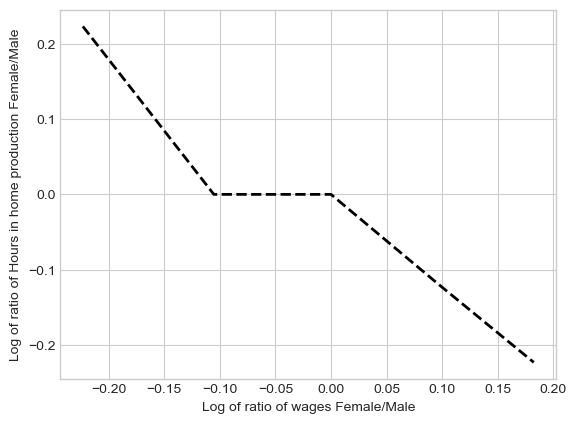

In [3]:
#calling the House Specialization model (RODRI Y ALE)
model = HouseholdSpecializationModelClass()

#creating the vectors with the different values of female wages
wF_new=np.array([0.8, 0.9, 1.0, 1.1, 1.2])

#create empty dictionary and lists to save the following results
l_wF = []
l_wM = []
l_r_wF_wM = []
l_lr_wF_wM = []
l_HF = [] 
l_HM = []
l_r_HF_HM = []
l_logr_HF_HM = []

#doing a loop to calculate the model with the new values of the female wages and print it
for a, wF in enumerate(wF_new):
        model.par.wF = wF
        solution=model.solve_discrete()

        l_wF.append(wF)
        l_wM.append(model.par.wM)

        l_r_wF_wM.append(wF/model.par.wM)
        l_lr_wF_wM.append(math.log(wF/model.par.wM))

        l_HF.append(solution.HF)
        l_HM.append(solution.HM)

        l_r_HF_HM.append(solution.HF/solution.HM)
        l_logr_HF_HM.append(math.log(solution.HF/solution.HM))

results = pd.DataFrame({'wF':l_wF, 'wM':l_wM, 'wF/wM':l_r_wF_wM, 'LOG_wF/wM':l_lr_wF_wM, 'HF':l_HF, 'HM':l_HM, 'HF/HM': l_r_HF_HM, 'LOG_HF/HM': l_logr_HF_HM})

#creating the graph
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(results["LOG_wF/wM"],results["LOG_HF/HM"],ls='--',lw=2,color='black')
ax.set_ylabel('Log of ratio of Hours in home production Female/Male')
ax.set_xlabel('Log of ratio of wages Female/Male')


# Question 3

**This point has a loop to calculate the utility for each value of female wage. The utility is calculated calling the solve_continously function. The results are continuous and presented in a graph of the ratio of wages (Female/Male) and the Logarithm of the ratio of Hours in home production (Female/Male).**

    wF   wM  wF/wM  LOG_wF/wM   HF   HM  HF/HM  LOG_HF/HM
0 0.80 1.00   0.80      -0.22 5.12 4.09   1.25       0.22
1 0.90 1.00   0.90      -0.11 4.75 4.27   1.11       0.11
2 1.00 1.00   1.00       0.00 4.45 4.45   1.00       0.00
3 1.10 1.00   1.10       0.10 4.22 4.64   0.91      -0.10
4 1.20 1.00   1.20       0.18 4.03 4.83   0.83      -0.18


Text(0.5, 0, 'Log of ratio of wages Female/Male')

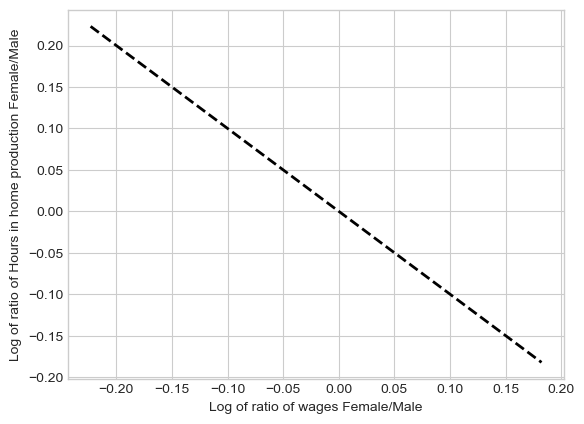

In [4]:
#calling the model
model = HouseholdSpecializationModelClass()

#creating the vectors with the different values of female wages
wF_new_2=np.array([0.8, 0.9, 1.0, 1.1, 1.2])

#create empty dictionary and lists to save the following results
dic_sol_q3 = {}
l_wF_3 = []
l_wM_3 = []
l_r_wF_wM_3 = []
l_logr_wF_wM_3 = []
l_HF_3 = [] 
l_HM_3 = []
l_r_HF_HM_3 = []
l_logr_HF_HM_3 = []

#doing a loop to calculate the model with the new values of the female wages and print it
for a, i in enumerate(wF_new_2):
    model.par.wF = i
    sol_q3 = model.solve_continously(do_print=False)
    dic_sol_q3[a] = {'wF': i, 'wM': model.par.wM, 'r_wF_wM': i/model.par.wM, 'HF': sol_q3.HF, 'HM': sol_q3.HM, 'r_HF_HM': sol_q3.HF/sol_q3.HM, 'logr_HF_HM': math.log(sol_q3.HF/sol_q3.HM), 'logr_wF_wM': math.log(i/model.par.wM)}
    l_wF_3.append(i)
    l_wM_3.append(model.par.wM) 
    l_r_wF_wM_3.append(i/model.par.wM)
    l_logr_wF_wM_3.append(math.log(i/model.par.wM))
    l_HF_3.append(sol_q3.HF)
    l_HM_3.append(sol_q3.HM)
    l_r_HF_HM_3.append(sol_q3.HF/sol_q3.HM)
    l_logr_HF_HM_3.append(math.log(sol_q3.HF/sol_q3.HM))

# print(dic_sol_q3[a])
results_3 = pd.DataFrame({'wF':l_wF_3, 'wM':l_wM_3, 'wF/wM':l_r_wF_wM_3, 'LOG_wF/wM':l_logr_wF_wM_3, 'HF':l_HF_3, 'HM':l_HM_3, 'HF/HM': l_r_HF_HM_3, 'LOG_HF/HM': l_logr_HF_HM_3})
print (results_3)

#creating the graph
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(results_3["LOG_wF/wM"],results_3["LOG_HF/HM"],ls='--',lw=2,color='black')
ax.set_ylabel('Log of ratio of Hours in home production Female/Male')
ax.set_xlabel('Log of ratio of wages Female/Male')


# Question 4

**This point defines a function that finds alpha and sigma such that it minimizes the sum of squared residuals. The method used is “Nelder-Mead”.**

c:\Users\Phili\OneDrive\Skrivebord\Latin-power-Project 1\projects-2023-latin-power\inauguralproject\inauguralproject_bis.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**(1-1/par.sigma) + (par.alpha)*HF**(1-1/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\Phili\OneDrive\Skrivebord\Latin-power-Project 1\projects-2023-latin-power\inauguralproject\inauguralproject_bis.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**(1-1/par.sigma) + (par.alpha)*HF**(1-1/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\Phili\OneDrive\Skrivebord\Latin-power-Project 1\projects-2023-latin-power\inauguralproject\inauguralproject_bis.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**(1-1/par.sigma) + (par.alpha)*HF**(1-1/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\Phili\OneDrive\Skrivebord\Latin-power-Project 1\projects-2023-latin-power\inauguralproject\inauguralproject_bis.py:

alpha = 0.982, sigma = 0.100


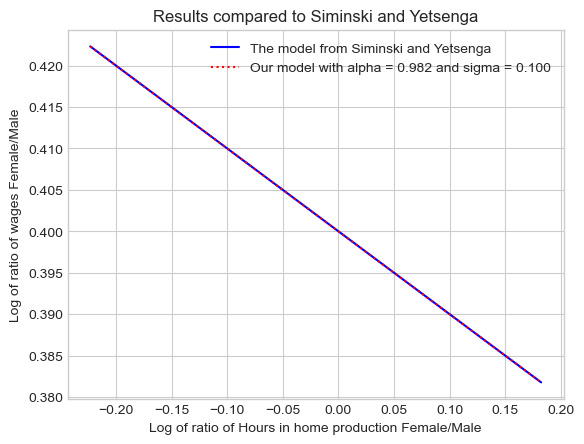

In [5]:
### New code 06-04-2023 (Philip)
#Initializing the model
model = HouseholdSpecializationModelClass()

#Defining the function
def q4_func(x):
 
    model.par.alpha = x[0]
    model.par.sigma = x[1]
    
    model.solve_wF_vec()
    model.run_regression()
    
    return ((model.par.beta0_target-model.sol.beta0)**2 + (model.par.beta1_target-model.sol.beta1)**2)

#Defining bounds for optimization
bounds = [(0.5, 1), (0, 2)]
#Initial guess
guess4 = [0.5,1] 
result4 = optimize.minimize(q4_func, guess4, bounds=bounds, method = "Nelder-Mead")

#printing results with three decimals
print(f"alpha = {result4.x[0]:.3f}, sigma = {result4.x[1]:.3f}")



# Assigning log(HF/HM) to name
log4_Home = np.log(model.sol.HF_vec/model.sol.HM_vec)
#Creating function from Siminski and Yetsenga
SY = model.par.beta0_target+ model.par.beta1_target*results_3["LOG_wF/wM"]

# Plotting the our results compared to SY
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# SY's model
ax.plot(results_3["LOG_wF/wM"],SY, label="The model from Siminski and Yetsenga", c='blue')
# Our model
ax.plot(results_3["LOG_wF/wM"],log4_Home, ':', c='red', label="Our model with alpha = 0.982 and sigma = 0.100")
#adding title
ax.set_title('Results compared to Siminski and Yetsenga')
#Label the axis
ax.set_xlabel("Log of ratio of Hours in home production Female/Male")
ax.set_ylabel("Log of ratio of wages Female/Male")
ax.legend()


**Interpretation:**
Given beta0 = 0.4 and beta1 = -0.1, the values found for alpha and sigma are 0.982 and 0.100, respectively.
With a high alpha value, women thus have a higher productivity at home compared to men. The low sigma suggest that there is a low degree of substitution in home production. This means that although wages increases for women compared to men, there will little changes in the dynamic of home production.

In [6]:
### Old code
#Initializing the model
model = HouseholdSpecializationModelClass()

def obj_func(par):
    alpha, sigma = par
    model.par.alpha = alpha
    model.par.sigma = sigma
    beta0_obj = 0.4
    beta1_obj = -0.1

    for i in range(5):
        model.par.wF = wF_new_2[i]
        results_4 = model.solve_continously()
        model.sol.HF_vec[i] = results_4.HF
        model.sol.HM_vec[i] = results_4.HM
    
    model.run_regression()
    beta0 = model.sol.beta0
    beta1 = model.sol.beta1
    
    return ((beta0_obj - beta0)**2 + (beta1_obj - beta1)**2)

par_g = [0.5,1.0]
bounds = ((0,1),(0,4))

#ans_4 = optimize.minimize(obj_func,par_g,bounds=bounds,method="Nelder-Mead")
#a4 = (ans_4.x[0],ans_4.x[1])

#print(f'The optimal values which minimize the gaps between alpha and beta observed and estimated are: alpha = {ans_4.x[0]:.4f} and sigma = {ans_4.x[1]:.4f}')


*Intuition:* The high alpha means that women has a higher productivity in home production than men. From sigma we can conclude that there is low elasticity of substitution between men and women.

# Question 5

In [7]:
# code
model = HouseholdSpecializationModelClass()
model.par.alpha

0.5

ADD CONCISE CONLUSION.